<center>
    <img src="https://weclouddata.s3.amazonaws.com/images/logos/wcd_logo_new_2.png" width='30%'> 
</center>

----------
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>WeCloudData</font></center>
<br>


<h2 align="left"> ML Project</h2>

<h4 align="left"> Bank Marketing Analysis Default - Python Notebook</h4>

<lef align="left"> <font size='2'> Kamel Chehboun</font></left>
<br>
<br>

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data=pd.read_csv('C://Users//kcheh//Documents//WCDBootcamp//Week9//bank-additional-full.csv',sep=';')

## Exploratory Data Analysis and Pre-Processing

### Univariate Analysis

In [3]:
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Categorical Features

In [4]:
categorical=data.select_dtypes(include='object').nunique()
print('Categorical features','\n','\n',categorical)

Categorical features 
 
 job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


### Target Feature

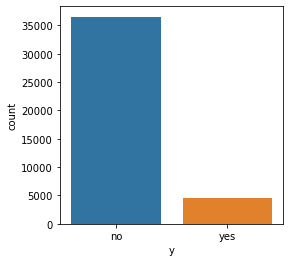

In [5]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="y", data=data)
plt.show()

##### It shows the highly imbalanced Data towards the number of people saying no to term deposit.

### One hot encoding of label feature

In [6]:
data['y']=data['y'].map({'yes': 1,'no': 0})

### Ordinal Features:
1. job
2. contact: Not needed
3. marital
4. education
5. month: Not needed
6. day_of_week

### Relationship of feature to label

In [8]:
def labelpercat_test(label, data):
    dataset = (data.groupby(['y'])[label]
                     .value_counts()
                     .rename('frequency')
                     .reset_index()
                     .sort_values(label))
    dataset['frequency']=dataset['frequency'].div(len(data))
    return dataset
labelpercat_test('job', data).head(3)

,y,job,frequency
0,0,admin.,0.220210
12,1,admin.,0.032825
1,0,blue-collar,0.209187


In [9]:
def labelpercat(label, data,axij):
    dataset = (data.groupby(['y'])[label]
                     .value_counts()
                     .rename('frequency')
                     .reset_index()
                     .sort_values(label))
    dataset['frequency']=dataset['frequency'].div(len(data))
    ax = sns.barplot(x=label, y="frequency", hue="y", data=dataset,ax=axij)
    _ = plt.setp(ax.get_xticklabels(), rotation=60)
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()))

<ipython-input-10-3eb064d1da39>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


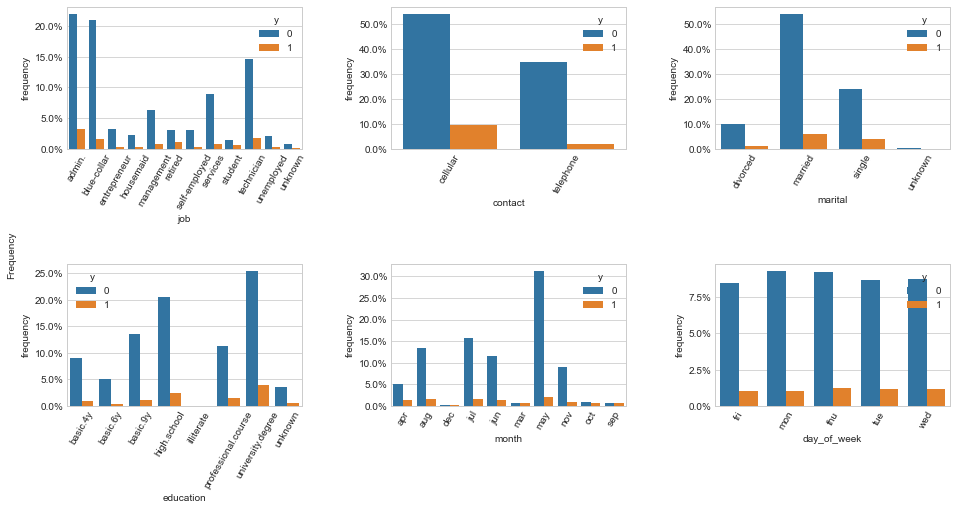

In [10]:
# Setting the plotting style
plt.style.use('seaborn-whitegrid')

# Creating a 3x2 panel for our visualization using matplotlib’s subplots() function  
fig, ax =plt.subplots(2,3, figsize=(14,8))

# Parsing the resulting panels into six variables.
ax11 = ax[0][0]
ax12 = ax[0][1]
ax21 = ax[0][2]
ax22 = ax[1][0]
ax31 = ax[1][1]
ax32 = ax[1][2]

# Plotting each feature into its corresponding panel
labelpercat('job', data,ax11)
labelpercat('contact', data,ax12)
labelpercat("marital", data,ax21)
labelpercat("education", data,ax22)
labelpercat('month', data,ax31)
labelpercat("day_of_week", data,ax32)

# Adding padding between panels
fig.tight_layout(pad=4.0)
fig.text(0.025, 0.5, 'Frequency', va='center', rotation='vertical')

fig.show()

In [79]:
# Before encoding the variable Education, and reduce the number of generated columns, 
# the 3 basic education levels were grouped into only one level
data.replace(['basic.4y','basic.6y', 'basic.9y'], 'basic', inplace=True)

In [80]:
# Removing nominal variable day_of_week as the same amount of data for all the days of the week, 
# and no:yes ratio is also almost same.
data.drop(['day_of_week'],axis=1,inplace=True)

#### One hot encoding of nominal variables

In [81]:
# One hot encoding of nominal variables
nominal = ['job','marital','education','contact','month']
data = pd.get_dummies(data,columns=nominal, drop_first=True)

### Ordinal Features:
1. poutcome

2. default: There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

3. housing
4. loan: Majority of the customers have a housing loan.

<ipython-input-82-e3fc2fad12ae>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


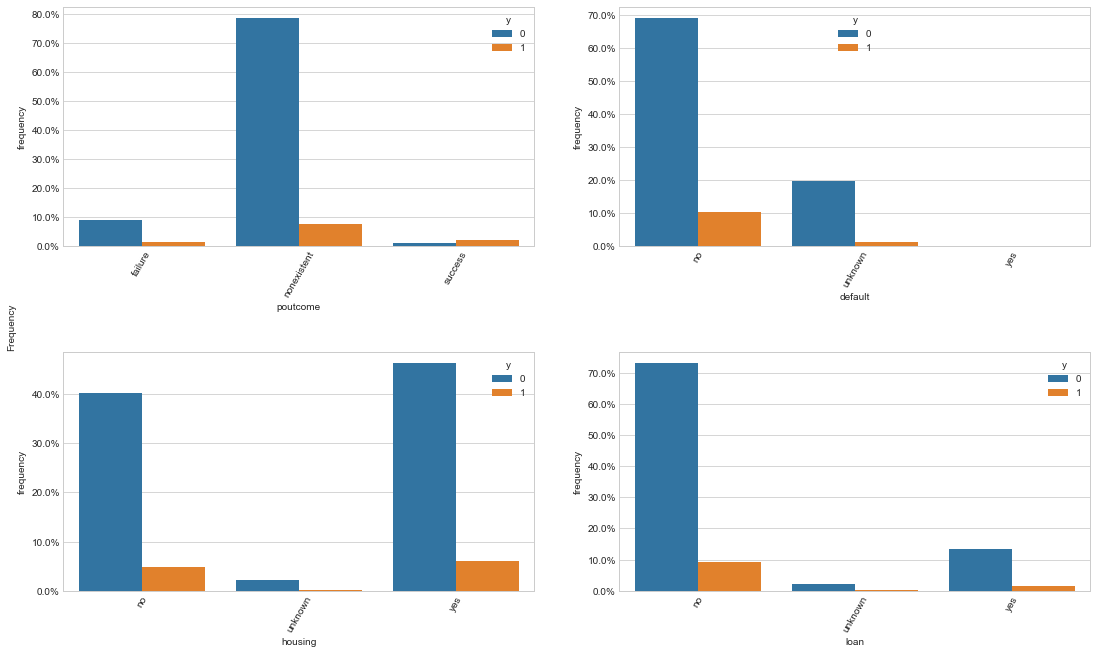

In [82]:
import tkinter

# Setting the plotting style
plt.style.use('seaborn-whitegrid')

# Creating a 2x2 panel for our visualization using matplotlib’s subplots() function  
fig, axes =plt.subplots(2,2, figsize=(16,10))

# Parsing the resulting panels into six variables.
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

# Plotting each feature into its corresponding panel
labelpercat("poutcome", data,ax11)
labelpercat('default', data,ax12)
labelpercat("housing", data,ax21)
labelpercat("loan", data,ax22)

# Adding padding between panels
fig.tight_layout(pad=4.0)
fig.text(0.025, 0.5, 'Frequency', va='center', rotation='vertical')

fig.show()

In [83]:
# Removing nominal variable default as only 3 customers (~0.01%) have defaulted. 
# While no status known for 20% of customers.
data.drop(['default'],axis=1,inplace=True)

In [84]:
# Encoding ordinal features
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

### Numerical features

In [85]:
# List of Numeric features
numericdata=data.select_dtypes(exclude='object').keys().tolist()
numericdata

['age',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep']

In [86]:
data[numericdata].describe()

,age,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,-0.071720,0.672575,258.285010,2.567593,962.475454,0.172963,-0.069899,0.081886,93.575664,...,0.365252,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839
std,10.42125,0.985314,0.723616,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,...,0.481507,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824
min,17.00000,-1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-3.400000,92.201000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,-1.000000,1.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,-1.000000,1.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.00000,1.000000,1.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,98.00000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,1.400000,94.767000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# Installing tkinter library as subplots were not showing
# https://stackoverflow.com/questions/56656777/userwarning-matplotlib-is-currently-using-agg-which-is-a-non-gui-backend-so
!pip install tk

<ipython-input-88-629bebb9c4cd>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


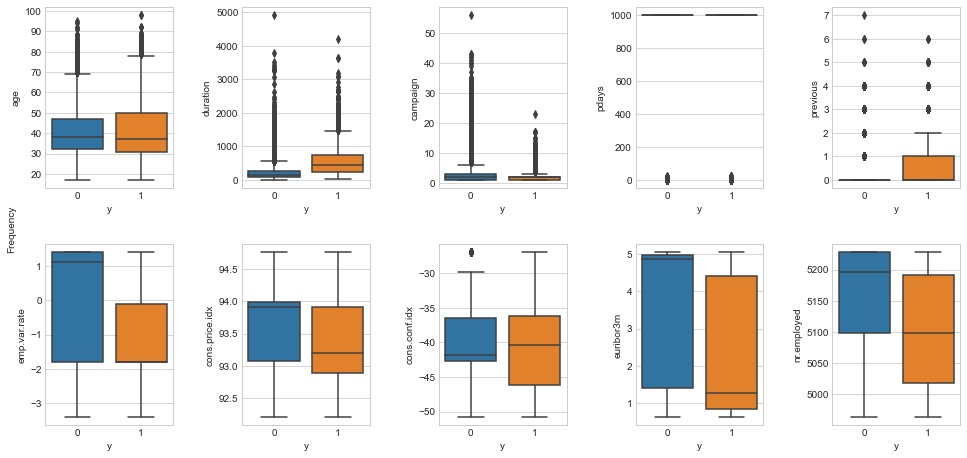

In [88]:
#import tkinter

# Setting the plotting style
plt.style.use('seaborn-whitegrid')

# Creating a 2x2 panel for our visualization using matplotlib’s subplots() function  
fig, axes =plt.subplots(2,5, figsize=(14,7))


# Plotting each feature into its corresponding panel
sns.boxplot(data=data,x="y", y="age",ax=axes[0, 0])
sns.boxplot(data=data, x="y", y="duration",ax=axes[0, 1])
sns.boxplot(data=data, x="y", y="campaign",ax=axes[0, 2])
sns.boxplot(data=data, x="y", y="pdays",ax=axes[0, 3])
sns.boxplot(data=data,x="y", y="previous",ax=axes[0, 4])
sns.boxplot(data=data, x="y", y="emp.var.rate",ax=axes[1, 0])
sns.boxplot(data=data, x="y", y="cons.price.idx",ax=axes[1, 1])
sns.boxplot(data=data, x="y", y="cons.conf.idx",ax=axes[1, 2])
sns.boxplot(data=data, x="y", y="euribor3m",ax=axes[1, 3])
sns.boxplot(data=data,x="y", y="nr.employed",ax=axes[1, 4])

# Adding padding between panels
fig.tight_layout(pad=3.0)
fig.text(0.025, 0.5, 'Frequency', va='center', rotation='vertical')

fig.show()

In [89]:
# The variable duration should be removed as not known before a call is performed. Keeping this 
# variable will highly affect predictive results as highly correlated with the target variable.
data.drop(['duration'],axis=1,inplace=True)

### Dealing with missing values 

In [90]:
data.isnull().sum()

age                              0
housing                          0
loan                             0
campaign                         0
pdays                            0
previous                         0
poutcome                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_high.school            0
education_illiterate

In [91]:
# Drop column pdays as too many unknown/ missing at random (numeric; 999 means client was not 
# previously contacted)
data.drop(['pdays'],axis=1,inplace=True)

### Dealing with duplicate data

In [92]:
data_dup = data[data.duplicated(keep="last")]
data_dup.shape

(3069, 41)

In [93]:
data = data.drop_duplicates()
data.shape

(38119, 41)

### Dealing with Outliers (Age and Campaign)

In [94]:
# create 4 equal sized groupings of age.
q_labels = [1, 2, 3,4]
data['age']=pd.qcut(data['age'], 4, labels=q_labels).astype('int64')
data['age'].value_counts()

1    10280
4     9359
3     9349
2     9131
Name: age, dtype: int64

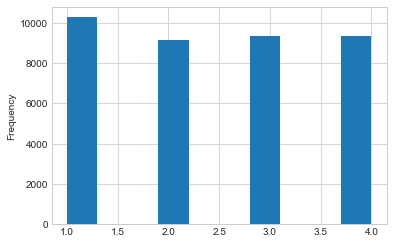

In [95]:
data['age'].plot(kind='hist');

In [96]:
q1 = data['campaign'].quantile(0.25)
q2 = data['campaign'].quantile(0.50)
q3 = data['campaign'].quantile(0.75)
print(q1,q2,q3)

1.0 2.0 3.0


In [97]:
# create 4 equal sized groupings of campaign.
q1 = data['campaign'].quantile(0.25)
q2 = data['campaign'].quantile(0.50)
q3 = data['campaign'].quantile(0.75)

q_labels = [q1,q2,q3]
data['campaign']=pd.qcut(data['campaign'],4, labels=q_labels, duplicates='drop').astype('int64')
data['campaign'].value_counts()

1    25492
3     7522
2     5105
Name: campaign, dtype: int64

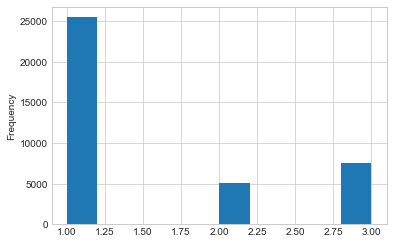

In [98]:
data['campaign'].plot(kind='hist');

### Exploring the cleaned data

In [99]:
print(data.shape)
data.head()

(38119, 41)


,age,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,4,1,1,1,0,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,0
1,4,1,1,1,0,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,0
2,2,-1,1,1,0,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,0
3,3,1,1,1,0,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,0
4,4,1,-1,1,0,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,0,0,1,0,0,0


### Correlation matrix of numerical features

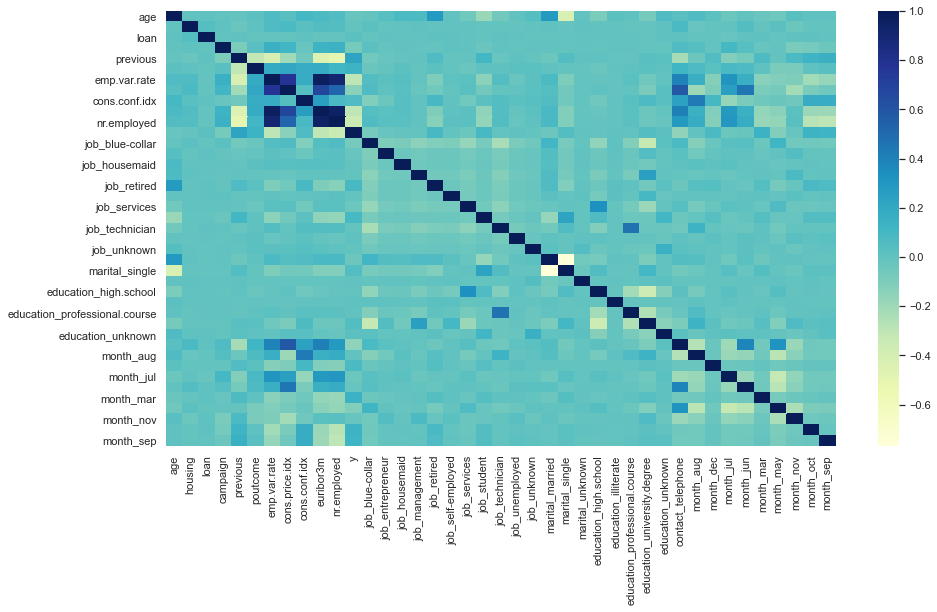

In [100]:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(),cmap="YlGnBu", annot=False);

## Machine Learning

In [101]:
data.to_csv('DS_W3_Py4DS_portfolio.csv')

In [102]:
data1=pd.read_csv('DS_W3_Py4DS_portfolio.csv')

In [104]:
data1.columns

Index(['Unnamed: 0', 'age', 'housing', 'loan', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_telephone', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [245]:
#Selecting features and label data
X = data.drop(columns='y')
y = data['y']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
strain_x, X_sample, strain_y, y_sample = train_test_split(X, y,test_size=0.10,random_state=42)

In [108]:
train_x, val_x, train_y, val_y = train_test_split(X_sample, y_sample,test_size=0.25,random_state=42)
train_x.shape,train_y.shape,(val_x.shape,val_y.shape)

((2859, 40), (2859,), ((953, 40), (953,)))

In [109]:
(val_y.value_counts()[1]/val_y.value_counts()[0]),(train_y.value_counts()[1]/train_y.value_counts()[0]),(y.value_counts()[1]/y.value_counts()[0])

(0.13723150357995226, 0.14222932481022774, 0.13686251118401432)

In [243]:
!pip install yellowbrick

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


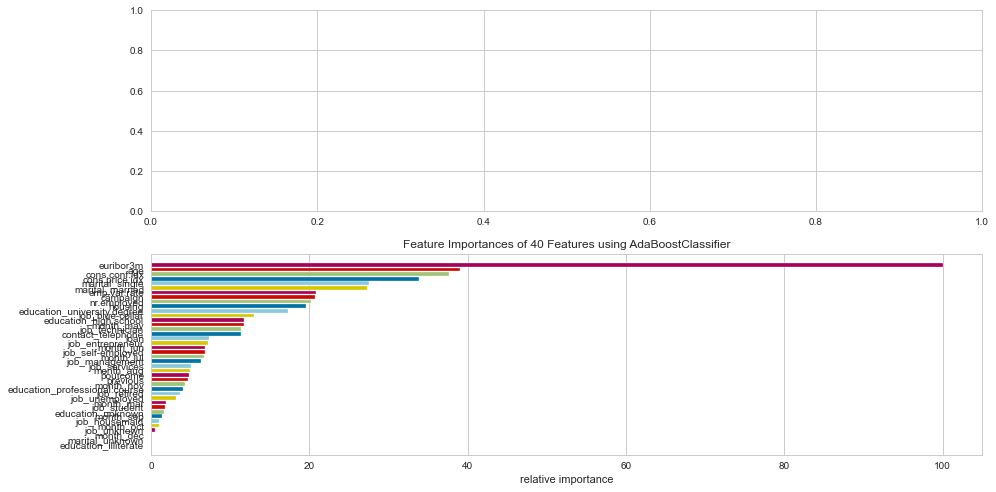

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


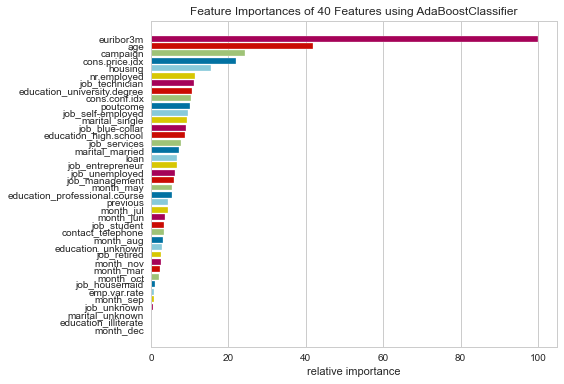

IndexError: too many indices for array

In [273]:

# Setting the plotting style
plt.style.use('seaborn-whitegrid')

# Creating a 2x2 panel for our visualization using matplotlib’s subplots() function  
fig, axes =plt.subplots(2,1, figsize=(14,7))

dt=feature_importances(AdaBoostClassifier(RandomForestClassifier(max_depth=5),n_estimators=100,random_state=42), val_x, val_y)
rf=feature_importances(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100,random_state=42), val_x, val_y)

# Plotting each feature into its corresponding panel
sns.boxplot(data=dt,ax=axes[0, 0])
sns.boxplot(data=rf,ax=axes[0, 1])


# Adding padding between panels
fig.tight_layout(pad=3.0)
fig.text(0.025, 0.5, 'Frequency', va='center', rotation='vertical')

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


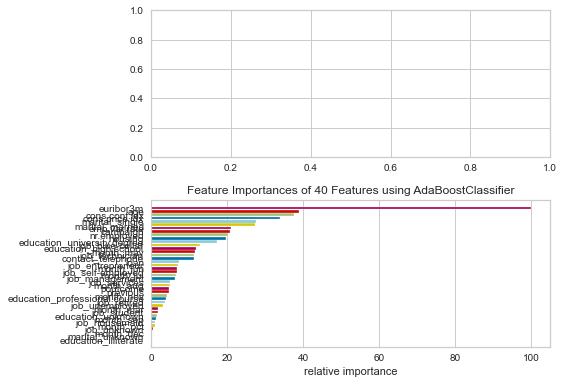

AttributeError: 'AdaBoostClassifier' object has no attribute 'plot'

In [271]:
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.model_selection import feature_importances

fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)



# Use the quick method and immediately show the figure
feature_importances(AdaBoostClassifier(RandomForestClassifier(max_depth=5),n_estimators=100,random_state=42), val_x, val_y).plot(ax=ax1)
feature_importances(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=100,random_state=42), val_x, val_y).plot(ax=ax2)

### Importing Modeling Libraries

In [110]:
# Importing sklearn packages

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics

from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,StackingClassifier,RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix,classification_report,roc_auc_score

from imblearn.pipeline import Pipeline,make_pipeline # Using imblearn instead of sklearn for Oversample into pipeline

## Machine Learning Models Evaluation (k-fold cross-validation)

### Configuring k-folds
- Chosing the default value for k: 5 as computational limitations.
- Folds are made by preserving the percentage of samples for each class using skfold.

In [111]:
from sklearn.model_selection import KFold, StratifiedKFold

# Setting Shuffle as True as otherwise, random_state has no effect.
# Samples within each split will not be shuffled.

k=5
skfold = KFold(n_splits=k, random_state=42, shuffle=True)

### Setting-up Pipeline with Pre-processing steps:
- RandomOverSampler for imbalanced data. (Using imblearn instead of sklearn as the latter not working within pipeline)
- StandardScaler for trained data normalization. 

In [165]:
from imblearn.pipeline import Pipeline # Using imblearn instead of sklearn for Oversample into pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
from sklearn.decomposition import PCA
def pipe(algorithm,label):
    if algorithm==LinearSVC:
        svm = LinearSVC()
        clf = CalibratedClassifierCV(svm)
        return (Pipeline([('Oversample', RandomOverSampler(random_state=42)),('scaling', MinMaxScaler()),(label, clf)]))
    else:
        return (Pipeline([('Oversample', ADASYN(random_state=42)),('scaling', MinMaxScaler()),(label, algorithm())]))

### Hyperparameters tuning using Gridsearch

In [113]:
from sklearn.model_selection import GridSearchCV

class tuned_model:
    def __init__(self, algorithm, label):
        self.algorithm = algorithm
        self.label = label
    
    def model(self):
        pipeline=pipe(algorithm,label)
        new_dict={}
        for i in range(len(hyperparms_list)):
            new_dict[label+'__'+hyperparms_list[i]] = hyperparms_values[i]
            gridsearch_parameters=new_dict
        f1_scorer = make_scorer(f1_score)
        return GridSearchCV(pipeline, gridsearch_parameters, cv=skfold,scoring=f1_scorer, n_jobs=-1).fit(train_x, train_y)

### Checking Overfitting/ Underfitting

In [114]:
def roc_curve(tuned,label):
    #Testing AUC on Test data
    clf = tuned.best_estimator_.named_steps[label]
    clf.fit(train_x,train_y)
    pred_test = clf.predict_proba(val_x)[:,1]
    fpr1, tpr1, thresholds1 = metrics.roc_curve(val_y, pred_test)
    pred_train = clf.predict_proba(train_x)[:,1]
    fpr2,tpr2,thresholds2 = metrics.roc_curve(train_y,pred_train)

    #plot ROC curve
    x = plt.subplot( )
    x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str('{0:0.2f}'.format(roc_auc_score(val_y,pred_test))))
    x.plot(fpr2, tpr2, label='Train ROC ,auc='+str('{0:0.2f}'.format(roc_auc_score(train_y,pred_train))))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    x.legend()
    plt.show()


### Displaying Model Performance 

In [115]:
from sklearn.metrics import confusion_matrix,classification_report

def best_parameters(model):
    # Showing Model Performance Results
    print (label,"Accuracy = %3.2f" %(model.score(train_x, train_y)))
    print ('Best parameters for',label,': ',model.best_params_)

def show_performance(predict):
    
    print('Classification Report:','\n',classification_report(val_y, predict))

    # Showing the resulting confusion_matrix
    class_names = ['negative','positive']
    data_heatmap = pd.DataFrame(confusion_matrix(val_y, predict), index=class_names, columns=class_names )
    fig = plt.figure( )
    heatmap = sns.heatmap(data_heatmap, annot=True, fmt="d")

### - Decision Tree Algorithm

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
# Setting the algorithm that should be processed within the pipeline
algorithm= DecisionTreeClassifier

# Setting the algorithm label that should be used as a prefix within the parameter grid
label= "DecisionTree"

# Setting the hyperparameters values that should be searched within the parameter grid
hyperparms_list=['max_depth','criterion','min_weight_fraction_leaf']
hyperparms_values=[[5,10],['gini', 'entropy'],[0,0.1,0.2,0.3]]

#  Instantiating the tuned model class
dt=tuned_model(algorithm,label)
tuned_dt=dt.model()

In [167]:
best_parameters(tuned_dt)

DecisionTree Accuracy = 0.48
Best parameters for DecisionTree :  {'DecisionTree__criterion': 'entropy', 'DecisionTree__max_depth': 5, 'DecisionTree__min_weight_fraction_leaf': 0.1}


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       838
           1       0.41      0.63      0.50       115

    accuracy                           0.85       953
   macro avg       0.68      0.76      0.70       953
weighted avg       0.88      0.85      0.86       953



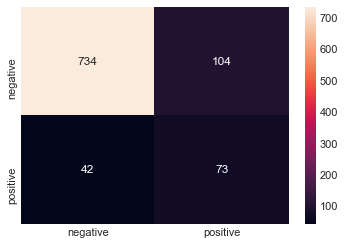

In [168]:
dt_predict=tuned_dt.predict(val_x)
show_performance(dt_predict)

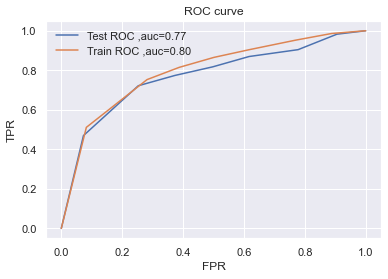

In [119]:
roc_curve(tuned_dt,label)

### - Random Forrest Algorithm

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Setting the algorithm that should be processed within the pipeline
algorithm= RandomForestClassifier

# Setting the algorithm label that should be used as a prefix within the parameter grid
label= "RandomForest"

# Setting the hyperparameters values that should be searched within the parameter grid
hyperparms_list=['max_depth','criterion','n_estimators','min_weight_fraction_leaf']
hyperparms_values=[[5],['gini', 'entropy'],[30,40,50],[0,0.1,0.2,0.3]]

#  Instantiating the tuned model class
rf=tuned_model(algorithm,label)
tuned_rf=rf.model()

In [121]:
best_parameters(tuned_rf)

RandomForest Accuracy = 0.48
Best parameters for RandomForest :  {'RandomForest__criterion': 'entropy', 'RandomForest__max_depth': 5, 'RandomForest__min_weight_fraction_leaf': 0, 'RandomForest__n_estimators': 50}


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       838
           1       0.39      0.67      0.50       115

    accuracy                           0.84       953
   macro avg       0.67      0.76      0.70       953
weighted avg       0.88      0.84      0.85       953



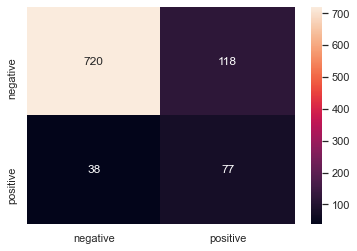

In [122]:
rf_predict=tuned_rf.predict(val_x)
show_performance(rf_predict)

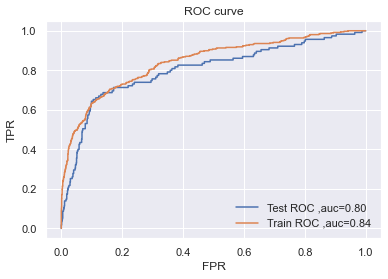

In [123]:
roc_curve(tuned_rf,label)

### - XGBClassifier Algorithm

In [124]:
from xgboost import XGBClassifier

# Setting the algorithm that should be processed within the pipeline
algorithm= XGBClassifier

# Setting the algorithm label that should be used as a prefix within the parameter grid
label= "XGB"

# Setting the hyperparameters values that should be searched within the parameter grid
hyperparms_list=['n_estimators','max_depth']
hyperparms_values=[[5,10,30],[3,5,10,20]]

#  Instantiating the tuned model classalgorithm= XGBClassifier
xg=tuned_model(algorithm,label)
tuned_xg=xg.model()

In [125]:
best_parameters(tuned_xg)

XGB Accuracy = 0.57
Best parameters for XGB :  {'XGB__max_depth': 5, 'XGB__n_estimators': 10}


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       838
           1       0.38      0.63      0.48       115

    accuracy                           0.83       953
   macro avg       0.66      0.75      0.69       953
weighted avg       0.88      0.83      0.85       953



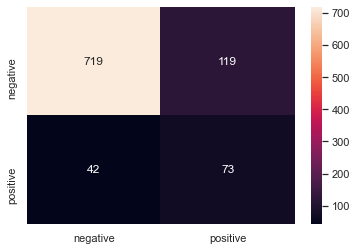

In [126]:
xg_predict=tuned_xg.predict(val_x)
show_performance(xg_predict)

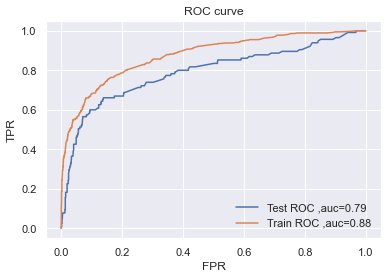

In [127]:
roc_curve(tuned_xg,label)

### - LogisticRegression Algorithm

In [128]:
from sklearn.linear_model import LogisticRegression

# Setting the algorithm that should be processed within the pipeline
algorithm= LogisticRegression

# Setting the algorithm label that should be used as a prefix within the parameter grid
label= "LogisticRegression"

# Setting the hyperparameters values that should be searched within the parameter grid
hyperparms_list=['C','max_iter']
hyperparms_values=[[10000,1000,100,10,1,0.1,0.01],[10000]]

#  Instantiating the tuned model class
lr=tuned_model(algorithm,label)
tuned_lr=lr.model()

In [129]:
best_parameters(tuned_lr)

LogisticRegression Accuracy = 0.48
Best parameters for LogisticRegression :  {'LogisticRegression__C': 10000, 'LogisticRegression__max_iter': 10000}


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       838
           1       0.38      0.64      0.48       115

    accuracy                           0.83       953
   macro avg       0.66      0.75      0.69       953
weighted avg       0.88      0.83      0.85       953



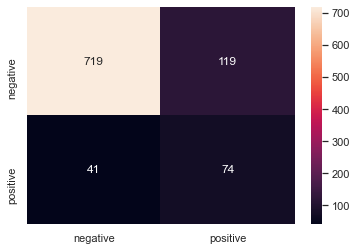

In [130]:
lr_predict=tuned_lr.predict(val_x)
show_performance(lr_predict)

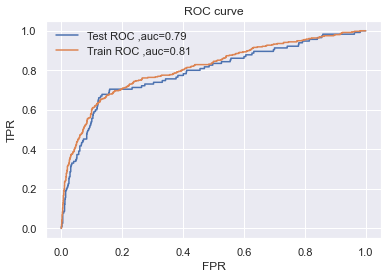

In [131]:
roc_curve(tuned_lr,label)

### - Linear SVM Algorithm

In [184]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]
dual=['False']

# Setting the algorithm that should be processed within the pipeline
algorithm= LinearSVC

# Setting the algorithm label that should be used as a prefix within the parameter grid
label= 'LinearSVC'

# Setting the hyperparameters values that should be searched within the parameter grid
hyperparms_list=['method']
hyperparms_values=[['sigmoid','isotonic']]

#  Instantiating the tuned model class
sv=tuned_model(algorithm,label)
tuned_sv=sv.model()

In [185]:
best_parameters(tuned_sv)

LinearSVC Accuracy = 0.48
Best parameters for LinearSVC :  {'LinearSVC__method': 'sigmoid'}


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       838
           1       0.38      0.65      0.48       115

    accuracy                           0.83       953
   macro avg       0.66      0.75      0.69       953
weighted avg       0.88      0.83      0.85       953



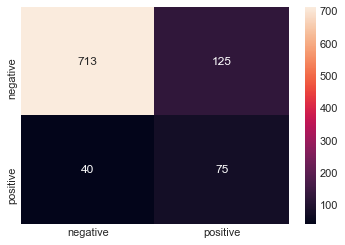

In [186]:
sv_predict=tuned_sv.predict(val_x)
show_performance(sv_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

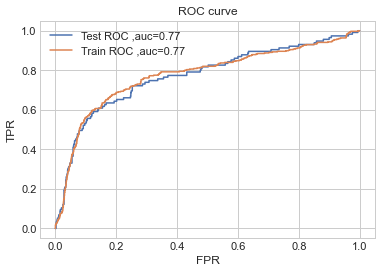

In [187]:
roc_curve(tuned_sv,label)

### - KNN Algorithm

In [136]:
from sklearn.neighbors import KNeighborsClassifier

# Setting the algorithm that should be processed within the pipeline
algorithm= KNeighborsClassifier

# Setting the algorithm label that should be used as a prefix within the parameter grid
label= "KNN"

# Setting the hyperparameters values that should be searched within the parameter grid
hyperparms_list=['n_neighbors']
hyperparms_values=[[15,20,25]]

#  Instantiating the tuned model class
kn=tuned_model(algorithm,label)
tuned_kn=kn.model()

In [137]:
best_parameters(tuned_kn)

KNN Accuracy = 0.47
Best parameters for KNN :  {'KNN__n_neighbors': 20}


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84       838
           1       0.28      0.69      0.40       115

    accuracy                           0.75       953
   macro avg       0.61      0.72      0.62       953
weighted avg       0.87      0.75      0.79       953



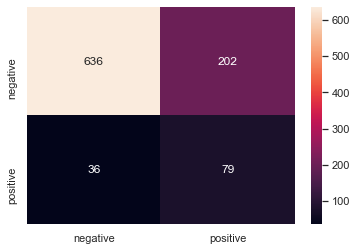

In [138]:
kn_predict=tuned_kn.predict(val_x)
show_performance(kn_predict)

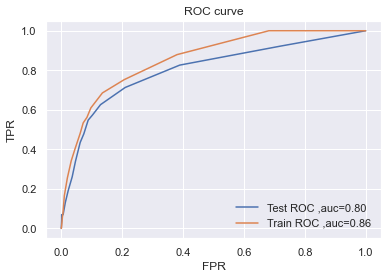

In [139]:
roc_curve(tuned_kn,label)

## Interpreting Models 
- Difficult to extract elements such as feature importances from Models as embedded into Pipelines.
- Python library ELI5 used to extract feature importances as Pipelines do not have attribute 'feature_importance' 

In [236]:
def feature_importance(label, tuned,axij):
    if tuned == tuned_lr:
        coefs = tuned.best_estimator_.named_steps[label].coef_.flatten()
    elif tuned == tuned_sv:
        coef = tuned.best_estimator_.named_steps[label]
        coef_avg = 0
        for i in coef.calibrated_classifiers_:
            coef_avg = coef_avg + i.base_estimator.coef_
        coefs  = coef_avg/len(coef.calibrated_classifiers_)
        
    else:
        coefs = tuned.best_estimator_.named_steps[label].feature_importances_.flatten()
    
    # Zip coefficients and names together and make a DataFrame
    feature_names=X.columns.tolist()
    zipped = zip(feature_names, coefs)
    df = pd.DataFrame(zipped, columns=["feature", "value"])
    df["abs_value"] = df["value"].apply(lambda x: abs(x))
    df=df.sort_values("abs_value", ascending=False)
    
    ax=sns.barplot(x="feature", y="value", data=df.head(20),ax=axij)
    #sns.barplot(x="feature", y="value", data=dfrf.head(20),ax=axes[0, 1])


    _ = plt.setp(ax.get_xticklabels(), rotation=60)
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()))


In [210]:
tuned_lr.best_estimator_.named_steps['LogisticRegression'].coef_.flatten()


array([ 0.00971098, -0.03065247,  0.05676794,  0.12520546,  0.26468001,
        0.95632324, -0.14879197,  0.27293715,  0.00996752, -0.25571643,
       -0.00518345, -0.10713829,  0.03129432, -0.1439416 , -0.19990311,
        0.23089427, -0.11682303, -0.19828951,  0.34211821,  0.21020646,
        0.0510311 ,  0.07461574,  0.2355061 ,  0.19555063,  0.00710923,
        0.2225223 ,  0.04038199, -0.28979954,  0.08042848,  0.03939487,
       -0.48241344,  0.20537651,  0.03903961,  0.06400545,  0.24832066,
        0.45401986, -0.77941681, -0.17117743, -0.36217939, -0.0198674 ])

<ipython-input-241-c874cd9ee122>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


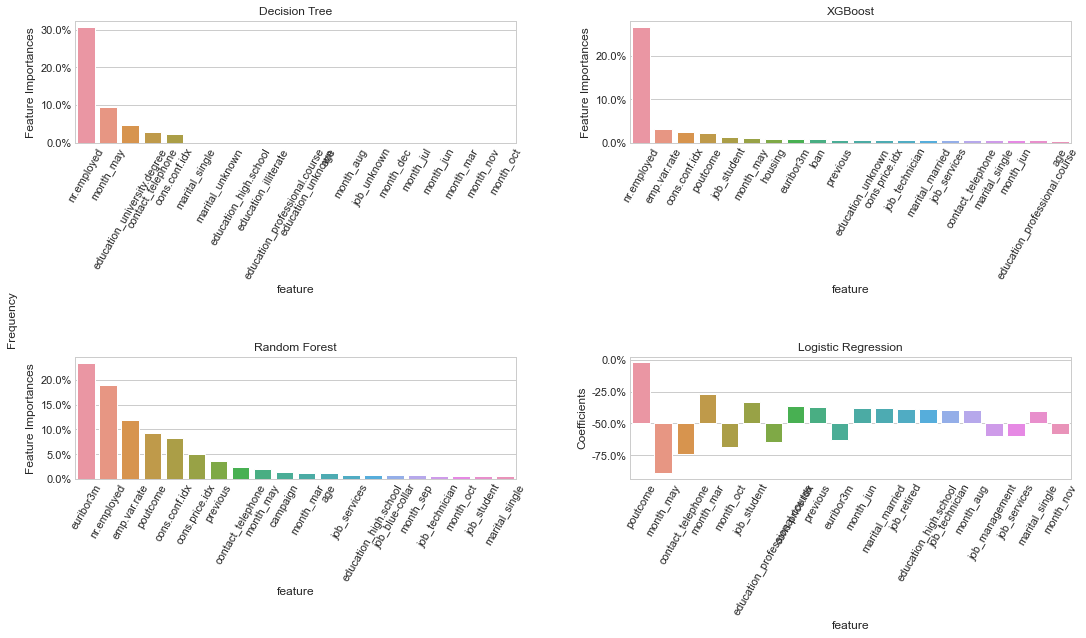

In [241]:
# Setting the plotting style
plt.style.use('seaborn-whitegrid')

# Creating a 2x2 panel for our visualization using matplotlib’s subplots() function  
fig, axes =plt.subplots(2,2, figsize=(16,10))

# Parsing the resulting panels into six variables.
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

# Plotting each feature into its corresponding panel
feature_importance("DecisionTree", tuned_dt,ax11)
feature_importance("XGB", tuned_xg,ax12)
feature_importance("RandomForest", tuned_rf,ax21)
feature_importance("LogisticRegression", tuned_lr,ax22) 

ax11.set(title = "Decision Tree",ylabel = "Feature Importances")
ax21.set(title = "Random Forest",ylabel = "Feature Importances")
ax22.set(title = "Logistic Regression",ylabel = "Coefficients")

# Adding padding between panels
fig.tight_layout(pad=4.0)
fig.text(0.025, 0.5, 'Frequency', va='center', rotation='vertical')
fig.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'bestfeatures'

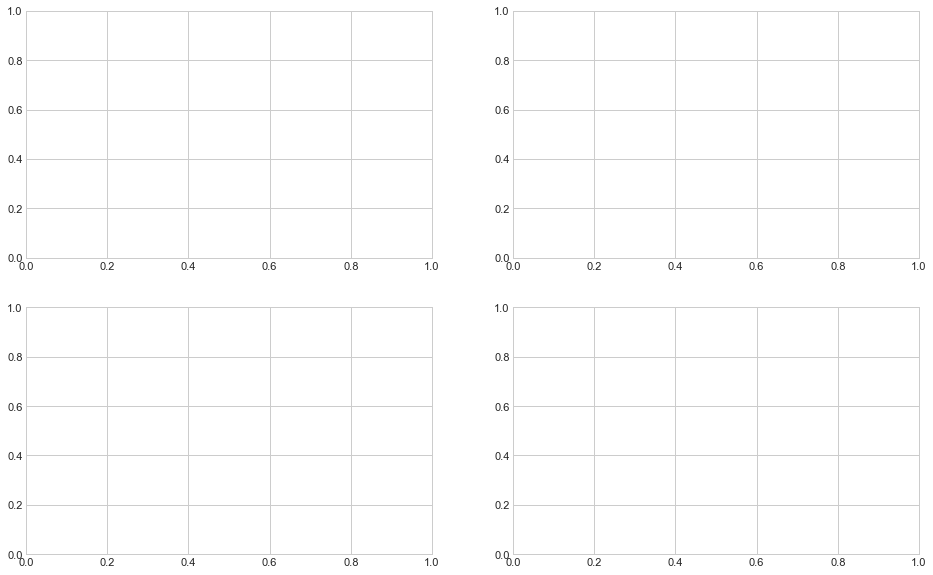

In [235]:
# Setting the plotting style
plt.style.use('seaborn-whitegrid')

# Creating a 2x2 panel for our visualization using matplotlib’s subplots() function  
fig, axes =plt.subplots(2,2, figsize=(16,10))

# Parsing the resulting panels into six variables.
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

# Plotting each feature into its corresponding panel
feature_importance("DecisionTree", tuned_dt,'feature_importances',ax11)
feature_importance("XGB", tuned_xg,'feature_importances',ax12)
feature_importance("LogisticRegression",'Coef', tuned_lr,ax22) 
feature_importance("RandomForest",'feature_importances', tuned_rf,ax21)




# Adding padding between panels
fig.tight_layout(pad=4.0)
fig.text(0.025, 0.5, 'Frequency', va='center', rotation='vertical')
fig.show()

## Comparing Models Performance
- Using the precision-recall curve as imbalanced classification
- Summary of the Performance of the 4 Models 

- Credit: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
- and https://www.kaggle.com/raphaelespanha/quick-way-to-precision-recall-curve-0-97

In [143]:
# Probability that data belongs to 1 for the 4 models
y_score_dt = tuned_dt.predict_proba(val_x)[:,-1]
y_score_rf = tuned_rf.predict_proba(val_x)[:,-1]
y_score_xg= tuned_xg.predict_proba(val_x)[:,-1]
y_score_kn = tuned_kn.predict_proba(val_x)[:,-1]

In [144]:
from sklearn.metrics import average_precision_score

average_precisiondt = average_precision_score(val_y, y_score_dt)
average_precisionrf = average_precision_score(val_y, y_score_rf)
average_precisionxg = average_precision_score(val_y, y_score_xg)
average_precisionkn = average_precision_score(val_y, y_score_kn)

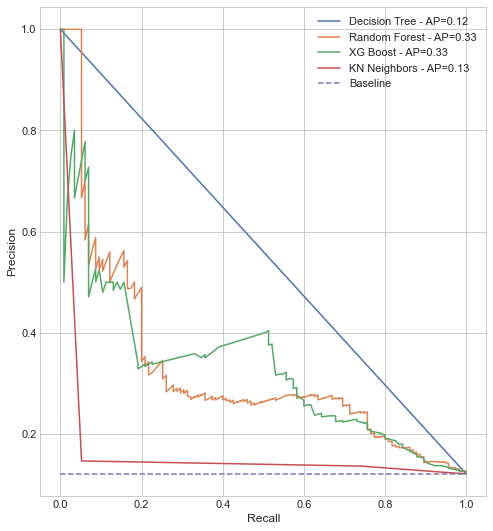

In [145]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Plotting the Precision-Recall Curves for the 4 models showing average_precision_scores 

precisiondt, recalldt, _ = precision_recall_curve(val_y, y_score_dt)
precisionrf, recallrf, _ = precision_recall_curve(val_y, y_score_rf)
precisionxg, recallxg, _ = precision_recall_curve(val_y, y_score_xg)
precisionkn, recallkn, _ = precision_recall_curve(val_y, y_score_kn)

APdt = average_precision_score(val_y, y_score_dt)
APrf = average_precision_score(val_y, y_score_rf)
APxg = average_precision_score(val_y, y_score_xg)
APkn = average_precision_score(val_y, y_score_kn)

fig, ax = plt.subplots(figsize=(8,9))
ax.plot(recalldt, precisiondt, label=('Decision Tree - AP={0:0.2f}'.format(APdt)))
ax.plot(recallrf, precisionrf, label=('Random Forest - AP={0:0.2f}'.format(APrf)))
ax.plot(recallxg, precisionxg, label=('XG Boost - AP={0:0.2f}'.format(APxg)))
ax.plot(recallkn, precisionkn, label=('KN Neighbors - AP={0:0.2f}'.format(APkn)))
baseline = len(y[y==1]) / len(y)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='best');

### Models' Performance Summary

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

column_names=['Precision Score','Reacall Score','F1 Score','Accuracy Score']
algorithms_names=['Decision Tree','Random Forest','XG Boost','KN Neighbors']
predictions=[dt_predict,rf_predict]

List=[]

for i in range(0, len(predictions)):
    Row = {}
    Row[0]='{0:0.2f}'.format(precision_score(y, predictions[i]))
    Row[1]='{0:0.2f}'.format(recall_score(y, predictions[i]))
    Row[2]='{0:0.2f}'.format(f1_score(y, predictions[i]))
    Row[3]='{0:0.2f}'.format(accuracy_score(y, predictions[i]))
    # Adding each row to the empty dataframe
    List.append(Row)

summary_table=pd.DataFrame(List)
summary_table.columns=column_names
summary_table['Models']=algorithms_names
summary_table.set_index('Models')

NameError: name 'dt_predict' is not defined